In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

DICCIONARIO_REGIONES = {1: 'EastEurope',
                        2: 'LatAm',
                        3: 'NorthAfrica',
                        4: 'SubSaharian',
                        5: 'WesternDem',
                        6: 'EastAsia',
                        7: 'SouthEastAsia',
                        8: 'SouthAsia',
                        9: 'Pacific',
                        10: 'Caribbean'}

SEMILLA_PSEUDOALEATORIA = '0115'
COLUMNAS_SALUD = ['wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']

In [2]:
def obtener_mitad_casos_df(df_largo):
    # Primero seria obtener el rango de indexes del df
    # Después sería obtener cuantos elementos se requieren
    # Después sería obtener la cantidad de elementos, pero sin repetirse
    cincuenta_porciento_casos = int(round(df_largo / 2, 0))
    indices_a_elegir = (random.sample(
        range(df_largo), cincuenta_porciento_casos))
    return indices_a_elegir


def obtener_submuestra(df):
    random.seed(SEMILLA_PSEUDOALEATORIA)

    columnas_a_utilizar = ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc',
                           'imf_pop'] + COLUMNAS_SALUD

    casos_a_obtener = obtener_mitad_casos_df(df.shape[0])
    df_cincuenta_casos = df.iloc[casos_a_obtener]
    df_cincuenta_columnas_a_utilizar = df_cincuenta_casos[columnas_a_utilizar]

    df_cincuenta_columnas_a_utilizar['ht_region'] = df_cincuenta_columnas_a_utilizar['ht_region'].replace(
        DICCIONARIO_REGIONES)

    return df_cincuenta_columnas_a_utilizar


def obtener_descripciones_variables(objeto):
    descripcion_variables_continuas = objeto.describe()
    print(descripcion_variables_continuas)

    variables_continuas = descripcion_variables_continuas.columns
    variables_discretas = set(objeto.columns) - set(variables_continuas)

    for variable_discreta in variables_discretas:
        print(objeto[variable_discreta].value_counts())


def calcular_observaciones_perdidas(dataframe, var, print_list=False):
    cantidad_lista_nan = dataframe[var].value_counts(dropna=False)
    porcentaje_lista_nan = dataframe[var].value_counts('%', dropna=False)

    if np.nan in cantidad_lista_nan.index:
        cantidad_nan = cantidad_lista_nan[np.nan]
        porcentaje_nan = porcentaje_lista_nan[np.nan]

    else:
        cantidad_nan = 0
        porcentaje_nan = 0

    if print_list:
        return cantidad_nan, porcentaje_nan, porcentaje_lista_nan

    else:
        return cantidad_nan, porcentaje_nan

def graficar_histograma(sample_df, full_df, var, true_mean, sample_mean=False):
    plt.hist(sample_df[var])

    if sample_mean:
        plt.axvline(sample_df[var].mean(), color='yellow')
    
    if true_mean:
        plt.axvline(full_df[var].mean(), color='red')
    
    plt.show()


In [3]:
# Con las siguientes lineas se obtuvo el diccionario que relaciona las regiones con sus codigos

# unidas = df_submuestra.merge(df_auxiliar, how='inner', on='ccodealp')
# DICCIONARIO_REGIONES = dict(unidas.groupby(by=['ht_region_x', 'ht_region_y']).sum().index)

In [4]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df_auxiliar = pd.read_csv('subsample_isz.csv')

In [5]:
df_submuestra = obtener_submuestra(df)
obtener_descripciones_variables(df_submuestra)

# La descripcion de las variables gle_cgdpc, undp_hdi e imf_pop se muestran en las columnas
# mostradas abajo

        undp_hdi      gle_cgdpc     imf_pop   wef_imort  who_alc2000  \
count  91.000000      96.000000   75.000000   77.000000    87.000000   
mean    0.693110   13141.156818   22.851093   24.360189     4.753908   
std     0.142295   17773.468801   39.279938   24.648970     3.864448   
min     0.421000     332.269990    0.012000    1.800000     0.000000   
25%     0.594000    2866.250000    1.292000    7.200000     1.355000   
50%     0.719000    6682.109850    6.880000   14.700000     3.780000   
75%     0.793000   16388.190000   27.767500   35.700001     8.080000   
max     0.938000  108481.130000  202.768997  117.400002    15.190000   

        who_tobt   wdi_exph  
count  61.000000  94.000000  
mean   23.875410   6.768343  
std     9.307822   2.713152  
min     7.000000   1.475303  
25%    16.200001   4.849392  
50%    23.799999   6.428007  
75%    30.299999   8.287694  
max    48.900002  17.135723  
SubSaharian      23
EastEurope       20
NorthAfrica      13
WesternDem       11
L

C:\Users\Javier\AppData\Local\Temp\ipykernel_11592\3539403651.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cincuenta_columnas_a_utilizar['ht_region'] = df_cincuenta_columnas_a_utilizar['ht_region'].replace(


In [6]:
for variable in df_submuestra.columns:
    cantidad_na, porcentaje_na, lista_na = calcular_observaciones_perdidas(
        df_submuestra, variable, True)
    
    print(f'El porcentaje de na de {variable} es {porcentaje_na * 100}')

print()
# Segun los resultados, las 3 variables con mayor porcentaje de na son:

variables_con_mas_na = ['who_tobt', 'imf_pop', 'wef_imort']

for variable in variables_con_mas_na:
    cantidad_na, porcentaje_na, lista_na = calcular_observaciones_perdidas(
        df_submuestra, variable, True)
    
    print(f'La lista de valores para {variable} es:\n{lista_na}')

El porcentaje de na de undp_hdi es 6.185567010309279
El porcentaje de na de ccodealp es 0
El porcentaje de na de ht_region es 0
El porcentaje de na de gle_cgdpc es 1.0309278350515463
El porcentaje de na de imf_pop es 22.68041237113402
El porcentaje de na de wef_imort es 20.618556701030926
El porcentaje de na de who_alc2000 es 10.309278350515463
El porcentaje de na de who_tobt es 37.11340206185567
El porcentaje de na de wdi_exph es 3.0927835051546393

La lista de valores para who_tobt es:
NaN          0.371134
23.799999    0.030928
26.700001    0.020619
30.700001    0.020619
14.200000    0.020619
21.900000    0.020619
14.500000    0.020619
30.299999    0.020619
23.500000    0.010309
28.100000    0.010309
33.400002    0.010309
11.700000    0.010309
39.200001    0.010309
22.000000    0.010309
28.000000    0.010309
36.799999    0.010309
15.300000    0.010309
7.000000     0.010309
36.000000    0.010309
19.500000    0.010309
34.400002    0.010309
30.400000    0.010309
13.300000    0.010309
2

Graficando la variable wef_imort


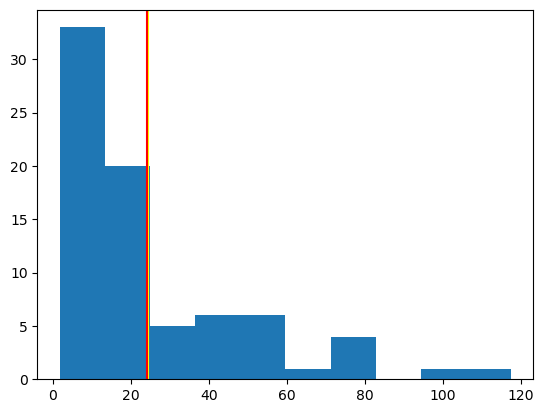

Graficando la variable who_alc2000


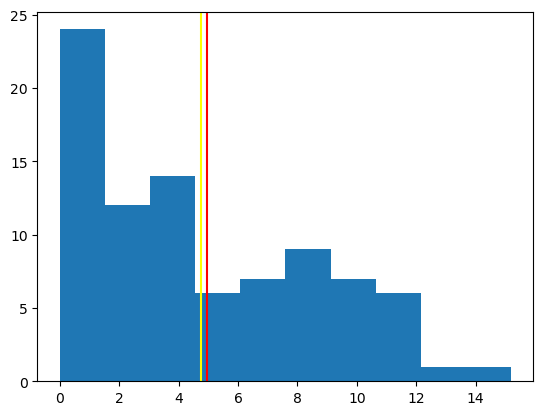

Graficando la variable who_tobt


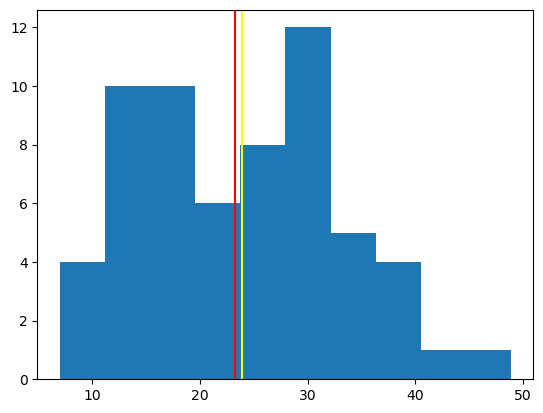

Graficando la variable wdi_exph


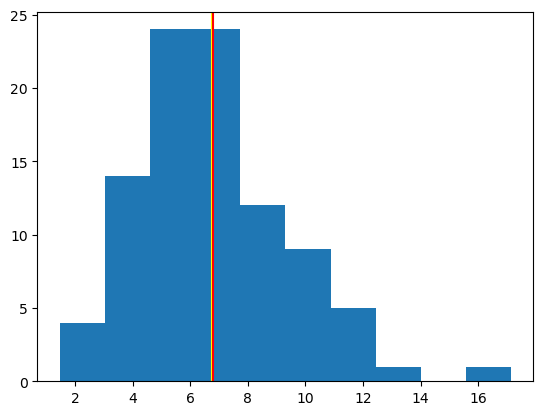

In [7]:
for variable_salud in COLUMNAS_SALUD:
    print(f'Graficando la variable {variable_salud}')
    graficar_histograma(df_submuestra, df, variable_salud, True, True)

# Amarillo para muestra y Rojo para total

# Segun los resultados, las variables wef_import y who_tobt tienen una media mayor
# en su muestra que en el dataframe completo

In [8]:
def graficar_dotplot_variable(dataframe, plot_var, plot_by, statistic='mean', global_stat=False):
    a_graficar = dataframe.groupby(plot_by)[plot_var]

In [9]:
df_submuestra.groupby(by=['ccodealp'])['imf_pop'].sum()

ccodealp
AFG    29.825001
AGO    25.789000
ARE     0.000000
ARM     2.980000
AZE     9.342000
         ...    
UGA    37.599998
UKR    42.759998
UZB    29.746000
VUT     0.257000
ZWE    12.459000
Name: imf_pop, Length: 97, dtype: float64

In [10]:
# O sea, hay que obtener las medidas de la media para cada una de las regiones.
# Por lo tanto, hay que iterar por cada una de las regiones
# Luego, para cada una de las regiones 

In [12]:
df_submuestra.to_csv('subsample_JARB_demo.csv')